## Huspris

Her har vi data som beskriver boligpriser i Ames, Iowa fra 2006 til 2010. Datasettet inneholder mange variabler som kan brukes til å vurdere boligverdi. Se [her](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview) for mer informasjon om data. I denne oppgaven ser vi kun på de numeriske data. 

In [1]:
# imports
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error

import plotly.express as px
import plotly.graph_objects as go

c:\Users\47476\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# les inn husprisdata
df = pd.read_csv('huspris.csv')

In [3]:
# del data i mål-, og prediktorvariabler
reduced_df = df.select_dtypes(include=[np.number]).drop('Id', axis=1).dropna()
X = reduced_df.drop('SalePrice', axis=1).values
y = reduced_df['SalePrice'].values

Del data i trenings-, validerigns-, og testdata med størrelser 70%, 15%, 15% av data. 

In [4]:
# dele data i trenings, validerings og testdata
# generer X_train, X_val, X_test, y_train, y_val, y_test
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.15, random_state=42)

Tren en Grunnlinjemodell på treningsdata og finn validerings-RMSE. 

In [5]:
baseline = RandomForestRegressor()
baseline.fit(X_train, y_train)
y_pred_baseline = baseline.predict(X_val)
rmse_baseline = mean_squared_error(y_val, y_pred_baseline)
rmse_baseline

985824261.1650553

Tren en Lasso regresjonsmodell (sklearn.linear_model.Lasso) med hyperparameter alpha mellom 1 og 500 på treningsdata. Sorter de ulike modellene etter mean kvadrert feil på valideringsdata (sklearn.metrics.mean_squared_error).
Visualiser hvordan mean kvadratisk feil avhenger av alpha. 

In [6]:
# tren forskjellige modeller
lasso_models = {alpha: Lasso(alpha=alpha) for alpha in np.arange(1, 500, 10)}

for alpha, model in lasso_models.items():
    model.fit(X_train, y_train)

In [7]:
# sjekk MSE for valideringsdata
mse = {alpha: mean_squared_error(y_val, model.predict(X_val)) for alpha, model in lasso_models.items()}

C:\Users\47476\AppData\Local\Temp\ipykernel_31444\2179544949.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


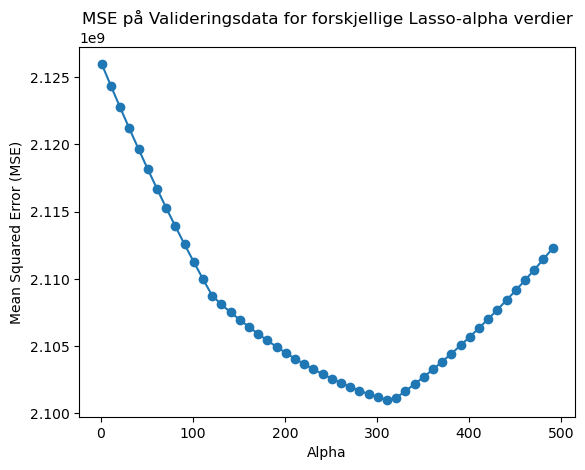

In [8]:
# visualiser validerings-MSE avhengig av alpha
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(list(mse.keys()), list(mse.values()), marker='o')
ax.set_xlabel('Alpha')
ax.set_ylabel('Mean Squared Error (MSE)')
ax.set_title('MSE på Valideringsdata for forskjellige Lasso-alpha verdier')
fig.show()

Lag alle polynomkombinasjoner av grad 2 av data (sklearn.preprocessing.PolynomialFeatures). 
Tren en Lasso regresjonsmodell (sklearn.linear_model.Lasso) med hyperparameter alpha mellom 500 og 1500 på polynomkombinasjoner av treningsdata.
Sorter de ulike modellene etter mean kvadrert feil på valideringsdata (sklearn.metrics.mean_squared_error).
Visualiser hvordan mean kvadratisk feil avhenger av alpha. 

In [9]:
# lag datasett med polynomielle data
poly = PolynomialFeatures(degree=2)
X_train_pf = poly.fit_transform(X_train)
X_val_pf = poly.transform(X_val)
X_test_pf = poly.transform(X_test)

In [10]:
# tren forskjellige modeller
alphas = np.arange(500, 1500, 50)
pf_models = {alpha: Lasso(alpha=alpha, max_iter=10000) for alpha in alphas}



In [11]:
# sjekk MSE for valideringsdata
pf_mse = {}
for alpha, model in pf_models.items():
    model.fit(X_train_pf, y_train)
    y_pred_val_pf = model.predict(X_val_pf)
    pf_mse[alpha] = mean_squared_error(y_val, y_pred_val_pf)

c:\Users\47476\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.698e+10, tolerance: 5.316e+08
  model = cd_fast.enet_coordinate_descent(
c:\Users\47476\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.741e+10, tolerance: 5.316e+08
  model = cd_fast.enet_coordinate_descent(
c:\Users\47476\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.782e+10, toleranc

C:\Users\47476\AppData\Local\Temp\ipykernel_31444\2521105622.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


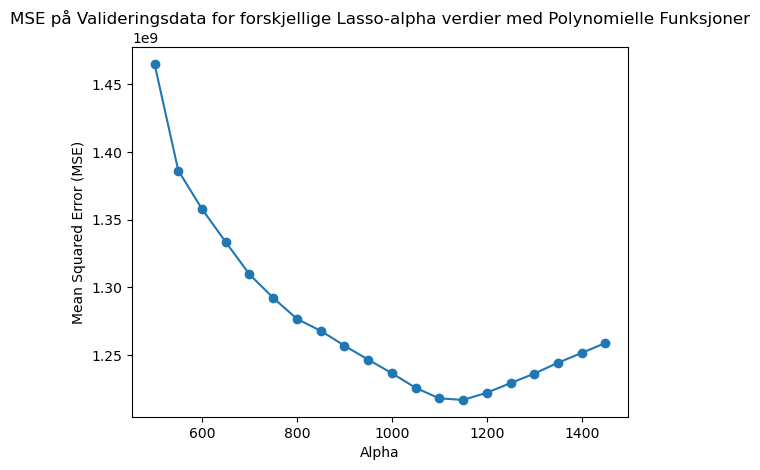

In [12]:
# visualiser validerings-MSE avhengig av alpha
fig, ax = plt.subplots()
ax.plot(list(pf_mse.keys()), list(pf_mse.values()), marker='o')
ax.set_xlabel('Alpha')
ax.set_ylabel('Mean Squared Error (MSE)')
ax.set_title('MSE på Valideringsdata for forskjellige Lasso-alpha verdier med Polynomielle Funksjoner')
fig.show()

Se om du kan finne en bedre modell med en annen metode enn Lasso regresjon (e.g. sklearn.linear_model.ElasticNet, sklearn.ensemble.RandomForestRegressor, sklearn.svm.SVR, sklearn.gaussian_process.GaussianProcessRegressor). Finn gode hyperparametre til metoden du velger ut. 

In [13]:
# tren forskjellige modeller
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
models = {
    'ElasticNet': ElasticNet(),
    'RandomForestRegressor': RandomForestRegressor(),
    'SVR': SVR(),
    'GaussianProcessRegressor': GaussianProcessRegressor()
}

# Definer hyperparameter grids (reduserte)
param_grids = {
    'ElasticNet': {'alpha': [0.1, 1, 10], 'l1_ratio': [0.1, 0.5, 0.9]},
    'RandomForestRegressor': {'n_estimators': [100, 200], 'max_depth': [10, 20]},
    'SVR': {'C': [0.1, 1], 'kernel': ['linear', 'rbf']},
    'GaussianProcessRegressor': {'alpha': [1e-10, 1e-5]}
}
best_models = {}
for model_name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train_pf, y_train)
    best_models[model_name] = grid_search.best_estimator_

c:\Users\47476\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.716e+10, tolerance: 4.293e+08
  model = cd_fast.enet_coordinate_descent(
c:\Users\47476\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.254e+10, tolerance: 3.911e+08
  model = cd_fast.enet_coordinate_descent(
c:\Users\47476\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.476e+10, toleranc

In [75]:
# sjekk MSE for valideringsdata
mse = {}
for model_name, model in best_models.items():
    y_pred_val = model.predict(X_val_pf)
    mse[model_name] = mean_squared_error(y_val, y_pred_val)

Velg ut den beste modellen og sjekk hvor godt den generaliserer ved å regne ut mean kvadrert feil og kvadratrooten av mean kvadrert feil på testdata. 

In [76]:
# sjekk generaliseringsevne
best_model_name = min(mse, key=mse.get)
best_model = best_models[best_model_name]
print(f"Beste modell: {best_model_name} med validerings-MSE: {mse[best_model_name]}")

# Sjekk generaliseringsevne på testdata
y_pred_test = best_model.predict(X_test_pf)
test_mse = mean_squared_error(y_test, y_pred_test)
print(f"Test MSE for beste modell ({best_model_name}): {test_mse}")

Gi en oppsummering over hva du har gjort og hva resultatet var. 

...